In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# import diabetes dataset from path
diabetes = pd.read_csv('/Users/sayanasabu/Downloads/diabetes.csv')

In [3]:
# print head
print(diabetes.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# import train_test_split
from sklearn.model_selection import train_test_split
# set X equal to all of the feature values
X = diabetes.to_numpy()
# remove 'Outcome' column from variable X
X = np.delete(X, 8, 1)
# set y equal to the value of the 'Outcome' column
y = diabetes['Outcome'].to_numpy()
# create train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Normalizing the features is vital to the kNN algorithm

In [5]:
# normalize the features
from sklearn import preprocessing, model_selection

scaler = preprocessing.StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# k-Nearest Neighbors
# k-Nearest Neighbors using scikit-learn
from sklearn.neighbors import KNeighborsClassifier
# fit model based on training data with NN = 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = knn.predict(X_test)

In [7]:
# print metrics
from sklearn import metrics
print('------ For KNN with n_neighbors = 3 ------')
print('Accuracy score with n_neighbors = 3:', metrics.accuracy_score(y_test, y_hat))
print('Precision score with n_neighbors = 3:', metrics.precision_score(y_test, y_hat))
print('Recall score with n_neighbors = 3:', metrics.recall_score(y_test, y_hat))

------ For KNN with n_neighbors = 3 ------
Accuracy score with n_neighbors = 3: 0.7402597402597403
Precision score with n_neighbors = 3: 0.5777777777777777
Recall score with n_neighbors = 3: 0.5531914893617021


In [8]:
# fit model based on training data with NN = 5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = knn.predict(X_test)

# print metrics
from sklearn import metrics
print('------ For KNN with n_neighbors = 5 ------')
print('Accuracy score with n_neighbors = 5:', metrics.accuracy_score(y_test, y_hat))
print('Precision score with n_neighbors = 5:', metrics.precision_score(y_test, y_hat))
print('Recall score with n_neighbors = 5:', metrics.recall_score(y_test, y_hat))

------ For KNN with n_neighbors = 5 ------
Accuracy score with n_neighbors = 5: 0.7987012987012987
Precision score with n_neighbors = 5: 0.6818181818181818
Recall score with n_neighbors = 5: 0.6382978723404256


In [9]:
# fit model based on training data with NN = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
# y_hat = our predictions based on X_test on the model learned from training data
y_hat = knn.predict(X_test)

# print metrics
from sklearn import metrics
print('------ For KNN with n_neighbors = 7 ------')
print('Accuracy score with n_neighbors = 7:', metrics.accuracy_score(y_test, y_hat))
print('Precision score with n_neighbors = 7:', metrics.precision_score(y_test, y_hat))
print('Recall score with n_neighbors = 7:', metrics.recall_score(y_test, y_hat))

------ For KNN with n_neighbors = 7 ------
Accuracy score with n_neighbors = 7: 0.7727272727272727
Precision score with n_neighbors = 7: 0.6363636363636364
Recall score with n_neighbors = 7: 0.5957446808510638


With varying accuracy scores, let us try to find a to find the optimum K value. 

Let us perform a cross validation on an array of K values. 

In [10]:
# k values array
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
# array to store the accuracies of all the k_values
accuracies = []

In [11]:
# normalize the features
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [12]:
# iterate through k_values array
for k in k_values:
    # create knn var with n_neighbors = k
    knn = KNeighborsClassifier(n_neighbors=k)
    # perform cross validation
    acc_score = model_selection.cross_val_score(knn, X, y)
    # append mean of accuracy score to accuracies array
    accuracies.append(np.mean(acc_score))

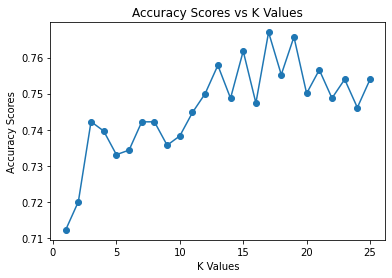

In [13]:
# plot graph of all k_values
plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy Scores vs K Values')
plt.xlabel('K Values')
plt.ylabel('Accuracy Scores')
plt.show()

In [14]:
# find optimum k by getting the argmax of acc array
# optimum k value will be the one that produces the highest accuracy
opt_k = k_values[np.argmax(accuracies)]
print('Optimum K value:', opt_k)

Optimum K value: 17


In [15]:
# fit model based on training data with NN = opt_k
knn_with_opt_k = KNeighborsClassifier(n_neighbors=opt_k)
knn_with_opt_k.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [16]:
# y_hat = our predictions based on X_test on the model learned from training data
y_hat_with_opt_k = knn_with_opt_k.predict(X_test)
print('------ For KNN with n_neighbors = ', opt_k, '------')
print('Accuracy score with n_neighbors =', opt_k, ':', metrics.accuracy_score(y_test, y_hat_with_opt_k))
print('Precision score with n_neighbors =', opt_k, ':', metrics.precision_score(y_test, y_hat_with_opt_k))
print('Recall score with n_neighbors =', opt_k, ':', metrics.recall_score(y_test, y_hat_with_opt_k))

------ For KNN with n_neighbors =  17 ------
Accuracy score with n_neighbors = 17 : 0.8116883116883117
Precision score with n_neighbors = 17 : 0.725
Recall score with n_neighbors = 17 : 0.6170212765957447


While, K = 17 produced the highest accuracy, it did lower the recall score compared to when K = 5. This could be to do undefitting as more datapoints are taken into consideration when trying to classify a new point. 